<a href="https://colab.research.google.com/github/Rogerio-mack/Ling-de-Prog-para-Ciencia-de-Dados/blob/master/PL_A1_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [ ]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('http://meusite.mackenzie.br/rogerio/kate_beckinsale.txt'): 
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    # para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    


# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'kathrin': 2, 'romary': 2, 'beckinsale': 70, 'chiswick': 2, '26': 2, 'de': 206, 'julho': 2, '1973': 2, 'é': 16, 'uma': 61, 'atriz': 5, 'britânica': 2, 'depois': 11, 'alguns': 3, 'papéis': 4, 'menores': 2, 'na': 25, 'televisão': 3, 'ela': 61, 'estreou': 2, 'no': 41, 'cinema': 5, 'em': 104, 'much': 2, 'ado': 2, 'about': 2, 'nothing': 4, '1993': 3, 'enquanto': 12, 'ainda': 2, 'era': 9, 'estudante': 2, 'universidade': 6, 'oxford': 6, 'apareceu': 12, 'dramas': 2, 'britânicos': 2, 'como': 43, 'prince': 2, 'of': 5, 'jutland': 2, '1994': 2, 'cold': 2, 'comfort': 2, 'farm': 2, '1995': 4, 'emma': 6, '1996': 2, 'e': 98, 'the': 22, 'golden': 1, 'bowl': 1, '2000': 1, 'além': 2, 'várias': 2, 'produções': 2, 'teatrais': 1, 'rádio': 1, 'começou': 1, 'a': 52, 'procurar': 1, 'trabalhos': 1, 'cinematográficos': 1, 'nos': 3, 'estados': 1, 'unidos': 1, 'final': 2, 'dos': 13, 'anos': 11, '90': 1, 'aparecer': 4, 'pequena': 2, 'escala': 1, 'os': 8, 'últimos': 1, 'dias': 1, 'disco': 2, '1998': 1, 'brokedown':

# Exibição dos Resultados

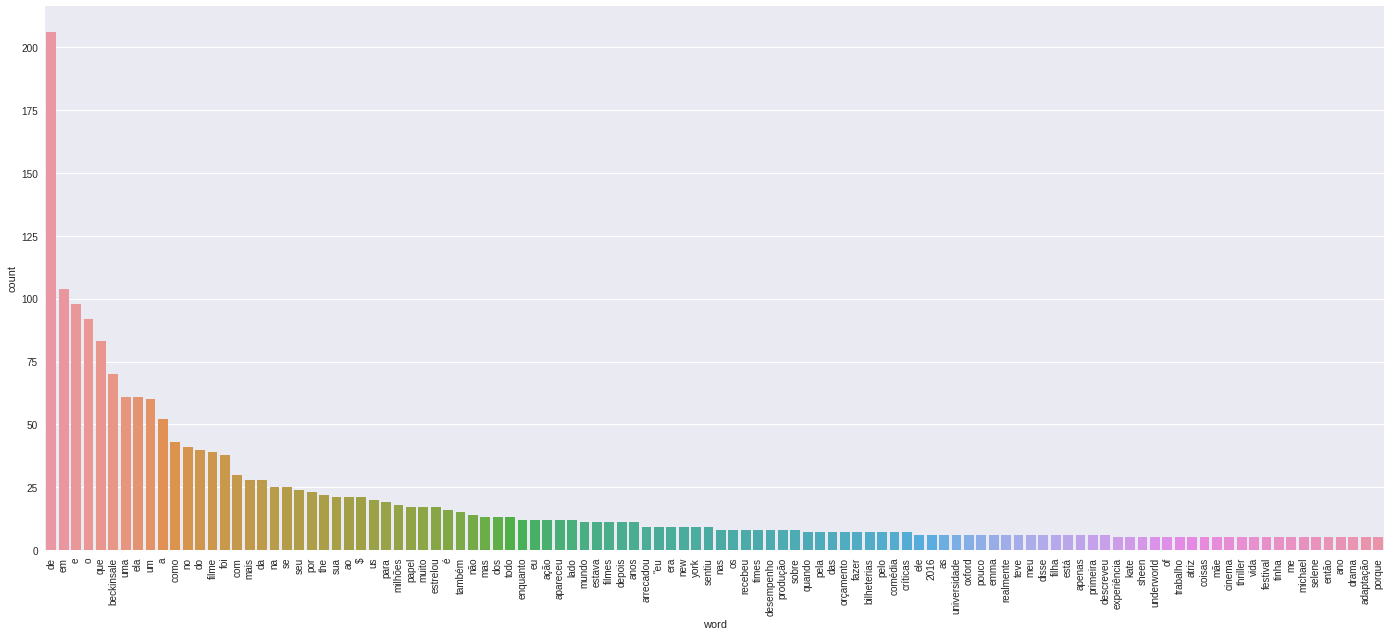

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()